In [1]:
# Install and import required libraries
!pip install pytube
!pip install opencv-python
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from pytube import YouTube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Mount Google Drive to access the temporary folder
drive.mount('/content/drive')

# Define the URL of the YouTube video to download
url = "https://youtu.be/pOnwPiL42Qw"

# Define the path to the temporary folder on Google Drive
temp_folder = '/content/drive/My Drive/temp/'

# Create the temporary folder if it doesn't exist
if not os.path.exists(temp_folder):
    os.makedirs(temp_folder)

# Download the YouTube video and save it to the temporary folder on Google Drive
yt = YouTube(url)
stream = yt.streams.get_highest_resolution()
temp_file = os.path.join(temp_folder, 'video.mp4')
stream.download(output_path=temp_folder, filename='video.mp4')

# Analyze the video for flashing lights or contrasting light and dark patterns
cap = cv2.VideoCapture(temp_file)

# Define the block size and threshold for the standard deviation
block_size = 32
std_threshold = 30

# Loop through each frame of the video
num_flashing_frames = 0
num_contrasting_frames = 0
while cap.isOpened():
    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Divide the frame into smaller regions and calculate the standard deviation of each region
    regions = [gray[i:i+block_size, j:j+block_size] for i in range(0, gray.shape[0], block_size) for j in range(0, gray.shape[1], block_size)]
    stds = np.array([np.std(region) for region in regions])
    
    # Count the number of regions that exceed the threshold for the standard deviation
    num_flashing_regions = np.sum(stds > std_threshold)
    num_contrasting_regions = np.sum(stds < std_threshold)
    
    # Determine whether the frame has enough flashing lights or contrasting light and dark patterns
    if num_flashing_regions >= 0.2 * len(regions):
        num_flashing_frames += 1
    if num_contrasting_regions >= 0.2 * len(regions):
        num_contrasting_frames += 1

# Determine whether the video has enough flashing lights or contrasting light and dark patterns
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
if num_flashing_frames >= 0.2 * num_frames:
    print("The video has enough flashing lights.")
if num_contrasting_frames >= 0.2 * num_frames:
    print("The video has enough contrasting light and dark patterns.")

# Release the video capture object and delete the temporary video file from Google Drive
cap.release()
os.remove(temp_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The video has enough flashing lights.
The video has enough contrasting light and dark patterns.


In [6]:
# Define the URL of the YouTube video to analyze
url = "https://youtu.be/pOnwPiL42Qw"

# Create a YouTube object and get the highest resolution stream
yt = YouTube(url)
stream = yt.streams.get_highest_resolution()

# Open the stream and start reading frames
cap = cv2.VideoCapture(stream.url)

# Define the block size and threshold for the standard deviation
block_size = 32
std_threshold = 30

# Loop through each frame of the video
num_flashing_frames = 0
num_contrasting_frames = 0
while True:
    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Divide the frame into smaller regions and calculate the standard deviation of each region
    regions = [gray[i:i+block_size, j:j+block_size] for i in range(0, gray.shape[0], block_size) for j in range(0, gray.shape[1], block_size)]

    # Calculate the local mean and standard deviation of each region
    means = np.array([np.mean(region) for region in regions])
    stds = np.array([np.std(region) for region in regions])
    
    # Calculate the adaptive threshold based on the local contrast of each region
    thresholds = means + stds / 2
    
    # Count the number of regions that exceed the threshold for the standard deviation
    num_flashing_regions = np.sum(stds > thresholds)
    num_contrasting_regions = np.sum(stds < thresholds)
    
    # Determine whether the frame has enough flashing lights or contrasting light and dark patterns
    if num_flashing_regions >= 0.2 * len(regions):
        num_flashing_frames += 1
    if num_contrasting_regions >= 0.2 * len(regions):
        num_contrasting_frames += 1

# Determine whether the video has enough flashing lights or contrasting light and dark patterns
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
if num_flashing_frames >= 0.2 * num_frames:
    print("The video has enough flashing lights.")
if num_contrasting_frames >= 0.2 * num_frames:
    print("The video has enough contrasting light and dark patterns.")

# Release the video capture object
cap.release()


The video has enough contrasting light and dark patterns.


<ipython-input-12-bf2a0e7126b4>:51: RuntimeWarning: invalid value encountered in scalar divide
  contrast = np.std(gray) / np.mean(gray)


Execution time: 118.2113618850708 seconds
The video has enough flashing lights.


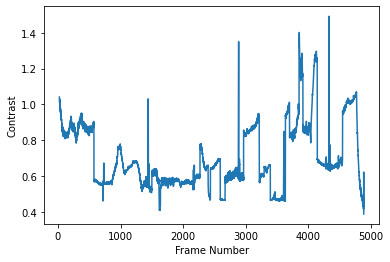

In [12]:
# Define the URL of the YouTube video to analyze
url = "https://youtu.be/pOnwPiL42Qw"

# Create a YouTube object and get the highest resolution stream
yt = YouTube(url)
stream = yt.streams.get_highest_resolution()

# Open the stream and start reading frames
cap = cv2.VideoCapture(stream.url)

# Define variables to store the contrast values and frame numbers
contrasts = []
frame_nums = []

# Define a variable to keep track of the frame number
frame_num = 0

# Define the block size and threshold for the standard deviation
block_size = 33
std_threshold = 30

# Loop through each frame of the video
num_flashing_frames = 0
num_contrasting_frames = 0

# Start timer for measuring execution time
start_time = time.time()

while True:
    # Read the next frame
    ret, frame = cap.read()
    if not ret:
        break
    
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to the frame
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, std_threshold)
    
    # Count the number of white pixels in the thresholded image
    num_white_pixels = np.sum(adaptive_thresh == 255)
    
    # Determine whether the frame has enough flashing lights or contrasting light and dark patterns
    if num_white_pixels >= 0.2 * gray.size:
        num_flashing_frames += 1
    if num_white_pixels <= 0.8 * gray.size:
        num_contrasting_frames += 1

    # Calculate the contrast of the grayscale image
    contrast = np.std(gray) / np.mean(gray)

    # Add the contrast value and frame number to the lists
    contrasts.append(contrast)
    frame_nums.append(frame_num)

    # Increment the frame number
    frame_num += 1

# Stop timer for measuring execution time
end_time = time.time()

# Calculate the execution time
execution_time = end_time - start_time

# Print the execution time
print(f"Execution time: {execution_time} seconds")

# Determine whether the video has enough flashing lights or contrasting light and dark patterns
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
if num_flashing_frames >= 0.2 * num_frames:
    print("The video has enough flashing lights.")
if num_contrasting_frames >= 0.2 * num_frames:
    print("The video has enough contrasting light and dark patterns.")

# Plot the contrast values over time
plt.plot(frame_nums, contrasts)
plt.xlabel("Frame Number")
plt.ylabel("Contrast")
plt.show()

# Release the video capture object
cap.release()
